<a href="https://colab.research.google.com/github/Silas-Asamoah/lending-club/blob/master/Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib import rcParams

%matplotlib inline

#Reducing the dimensions of the dataset to 8 by 6
rcParams['figure.figsize'] = 8, 6



In [46]:
!pip install kaggle

In [47]:
import os 

os.environ['KAGGLE_USERNAME'] = "geeksilas"
os.environ['KAGGLE_KEY'] = "71c0c6bfc6e7ad9041f9fe77ce09cb52"

!kaggle datasets download -d wendykan/lending-club-loan-data

lending-club-loan-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [48]:
!unzip lending-club-loan-data.zip

Archive:  lending-club-loan-data.zip
replace LCDataDictionary.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace loan.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [49]:
df_loan = pd.read_csv("loan.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [51]:
df_load.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,...,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,...,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,...,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,...,0.0,0.0,385183.0,36151.0,5000.0,44984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,NaN,NaN,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,...,0.0,0.0,157548.0,29674.0,9300.0,32332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [53]:
print(df_loan.shape)
print(df_loan.isnull().sum().value_counts())

(2260668, 145)
0          32
70276      16
2250055    13
2152647     8
866129      8
29          7
2227612     6
50030       4
866130      3
2260668     3
70277       3
58590       2
145         2
1068850     1
139071      1
2139962     1
166969      1
1303607     1
2139958     1
1802        1
1           1
295435      1
4           1
76071       1
2152648     1
70431       1
30          1
23325       1
1679893     1
866348      1
2154484     1
2134601     1
1365        1
146907      1
153657      1
2252242     1
70346       1
1901512     1
73412       1
74935       1
1520309     1
1711        1
2144938     1
1740967     1
73          1
2426        1
75379       1
105         1
1158502     1
2224726     1
909924      1
dtype: int64


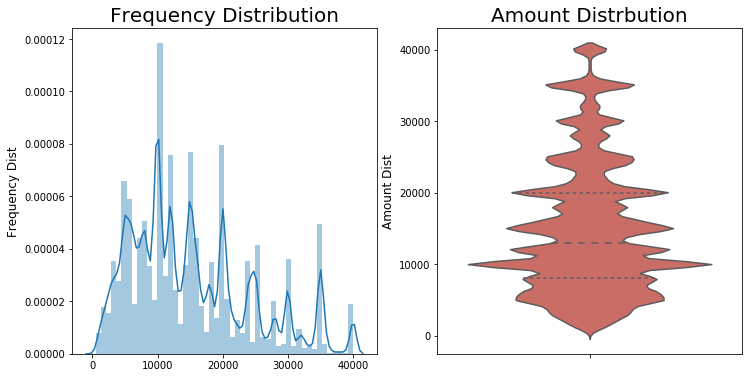

In [54]:
# Loan amount column
plt.figure(figsize=(12, 6))

plt.subplot(121)
loan_dist = sns.distplot(df_loan["loan_amnt"])
loan_dist.set_xlabel("", fontsize=12)
loan_dist.set_ylabel("Frequency Dist", fontsize=12)
loan_dist.set_title("Frequency Distribution", fontsize = 20)

plt.subplot(122)
loan_amt = sns.violinplot(y="loan_amnt", data=df_loan, inner="quartile", palette="hls")
loan_amt.set_xlabel("", fontsize=12)
loan_amt.set_ylabel("Amount Dist", fontsize=12)
loan_amt.set_title("Amount Distrbution", fontsize=20)

plt.show()


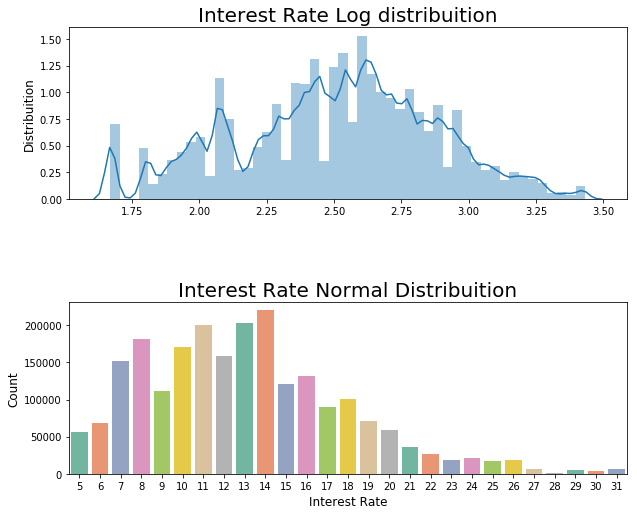

In [55]:
#Interest Rate Column

df_round = df_loan["int_rate"].round(0).astype(int)


plt.figure(figsize=(10,8))

plt.subplot(211)
interest_rate = sns.distplot(np.log(df_loan["int_rate"]))

interest_rate.set_xlabel("", fontsize=12)
interest_rate.set_ylabel("Distribuition", fontsize=12)
interest_rate.set_title("Interest Rate Log distribuition", fontsize=20)

plt.subplot(212)
interest_round = sns.countplot(x=df_round,data=df_loan, palette="Set2")
interest_round.set_xlabel("Interest Rate", fontsize=12)
interest_round.set_ylabel("Count", fontsize=12)
interest_round.set_title("Interest Rate Normal Distribuition", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()

In [0]:
df_loan['issue_month'], df_loan['issue_year'] = df_loan['issue_d'].str.split('-', 1).str

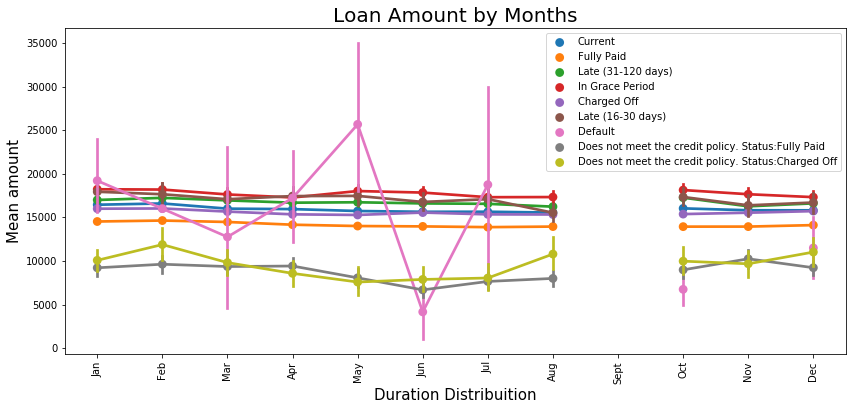

In [57]:
# Analyzing Loan Amount by Months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

df_loan['issue_month'] = pd.Categorical(df_loan['issue_month'], categories=month_order, ordered=True)

plt.figure(figsize = (14,6))

loan_month = sns.pointplot(x='issue_month', y='loan_amnt', data=df_loan, hue='loan_status')

loan_month.set_xticklabels(loan_month.get_xticklabels(),rotation=90)
loan_month.set_xlabel("Duration Distribuition", fontsize=15)

loan_month.set_ylabel("Mean amount", fontsize=15)
loan_month.legend(loc='best')
loan_month.set_title("Loan Amount by Months", fontsize=20)
plt.show()


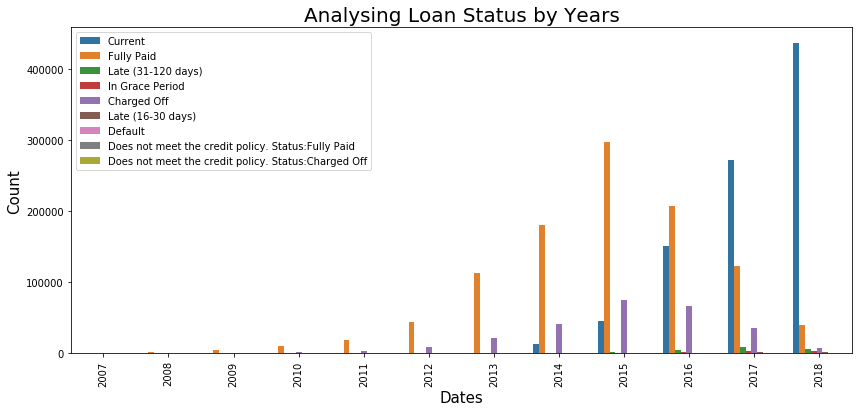

In [58]:
# Loan Amount By years

plt.figure(figsize = (14,6))

loan_amount = sns.countplot(x='issue_year', data=df_loan, hue='loan_status')

loan_amount.set_xticklabels(loan_amount.get_xticklabels(),rotation=90)
loan_amount.set_xlabel("Dates", fontsize=15)
loan_amount.set_ylabel("Count", fontsize=15)
loan_amount.legend(loc='upper left')
loan_amount.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

No handles with labels found to put in legend.


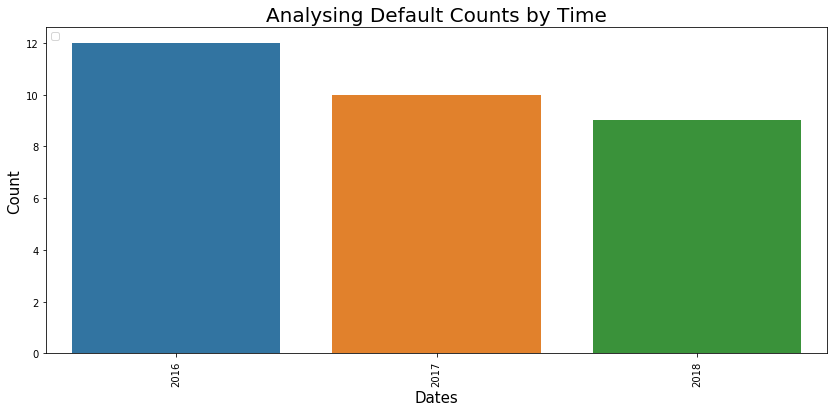

In [62]:
#Loan default by year

plt.figure(figsize = (14,6))

loan_default = sns.countplot(x='issue_year', data= df_loan[df_loan['loan_status'] == 'Default'])

loan_default.set_xticklabels(loan_default.get_xticklabels(),rotation=90)
loan_default.set_xlabel("Dates", fontsize=15)
loan_default.set_ylabel("Count", fontsize=15)
loan_default.legend(loc='upper left')
loan_default.set_title("Analysing Default Counts by Time", fontsize=20)

plt.show()

In [63]:
loan_purpose = ['purpose', 'loan_status']

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_purpose[0]], df_loan[loan_purpose[1]]).style.background_gradient(cmap=cm)


loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,,,
car,2067,9502,1,13,51,12053,82,35,209
credit_card,48646,224406,4,69,271,237058,1728,701,4088
debt_consolidation,161039,499009,19,292,808,596552,5344,2179,12635
educational,56,1,0,32,65,270,0,0,0
home_improvement,15085,63435,2,71,143,69410,612,250,1449
house,1513,6820,0,11,33,5454,59,35,211
major_purchase,5304,21130,0,23,100,23024,191,92,581
medical,3291,11913,1,22,36,11732,121,54,318
moving,2150,5899,1,15,31,7022,74,24,187


In [64]:
loan_grade = ['loan_status', 'grade']

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_grade[0]], df_loan[loan_grade[1]]).style.background_gradient(cmap=cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,13766,51077,83262,59441,35364,14263,4482
Current,204435,275455,267326,120666,40174,9006,2633
Default,2,6,9,8,4,2,0
Does not meet the credit policy. Status:Charged Off,8,85,148,197,158,93,72
Does not meet the credit policy. Status:Fully Paid,90,269,481,494,378,154,122
Fully Paid,212477,329075,286666,135839,56206,17220,4469
In Grace Period,668,2008,3194,1965,794,230,93
Late (16-30 days),267,824,1327,829,335,114,41
Late (31-120 days),1314,4758,7640,4985,2226,718,256


In [65]:
loan_home = ['loan_status', 'home_ownership']

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_home[0]], df_loan[loan_home[1]]).style.background_gradient(cmap=cm)


home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,52,111662,7,27,29011,120896
Current,706,449394,1,0,108736,360858
Default,0,13,0,0,5,13
Does not meet the credit policy. Status:Charged Off,0,348,1,11,49,352
Does not meet the credit policy. Status:Fully Paid,0,908,4,27,138,911
Fully Paid,215,533834,41,117,110833,396912
In Grace Period,7,4161,0,0,1097,3687
Late (16-30 days),3,1737,0,0,452,1545
Late (31-120 days),13,9393,0,0,2736,9755


In [66]:
loan_verification = ['loan_status', 'verification_status']

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_verification[0]], df_loan[loan_verification[1]]).style.background_gradient(cmap=cm)

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,57698,106377,97580
Current,341730,367650,210315
Default,7,11,13
Does not meet the credit policy. Status:Charged Off,511,82,168
Does not meet the credit policy. Status:Fully Paid,1321,208,459
Fully Paid,334507,397349,310096
In Grace Period,2295,3831,2826
Late (16-30 days),1015,1513,1209
Late (31-120 days),5722,9210,6965


In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [78]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot


import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)

plotly.offline.plot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)


'file:///content/temp-plot.html'

In [80]:
import plotly.offline as py

py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

from collections import Counter

#First plot
trace0 = go.Bar(
    x = df_loan['verification_status'].value_counts().index.values,
    y = df_loan['verification_status'].value_counts().values,
    marker=dict(
        color=df_loan['verification_status'].value_counts().values,
        colorscale = 'Viridis'
    ),
)

data = [trace0]

layout = go.Layout(yaxis=dict(title='Count'),xaxis=dict(title='Status'),title='Verification Status Count')
fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename='verification-bar')

/usr/local/lib/python3.6/dist-packages/plotly/offline/offline.py:635: UserWarning:

Your filename `verification-bar` didn't end with .html. Adding .html to the end of your file.



'file:///content/verification-bar.html'